In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime as dt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import random
import pprint
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('data/prepocessed.csv', header=0, usecols=['Date Local', 'NO2 Mean'], parse_dates=['Date Local'], index_col='Date Local', date_parser=dateparse)
#data = data.drop(data.columns[0], axis=1)
data = data.groupby(['Date Local']).mean().reset_index()


  Date Local   NO2 Mean
0 2000-01-01  18.508666
1 2000-01-02  14.692258
2 2000-01-03  23.754976
3 2000-01-04  24.160910
4 2000-01-05  23.804671


In [7]:
data = data.set_index('Date Local')
print(data.head())

             NO2 Mean
Date Local           
2000-01-01  18.508666
2000-01-02  14.692258
2000-01-03  23.754976
2000-01-04  24.160910
2000-01-05  23.804671


In [9]:
dataValues = data.values
train, test = dataValues[0:int(len(dataValues) * 0.80)], dataValues[int(len(dataValues) * 0.80):len(dataValues)]
trainingData = [x for x in train]
predictions = []

for item in range(len(test)):
    model = ARIMA(trainingData, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predicted = output[0]
    predictions.append(predicted)
    observation = test[item]
    trainingData.append(observation)
    print('predicted=%f, expected=%f' % (predicted, observation))

predicted=11.884375, expected=8.811442
predicted=10.126893, expected=10.434243
predicted=12.873888, expected=10.762850
predicted=11.678488, expected=8.524740
predicted=9.827592, expected=10.044938
predicted=11.513381, expected=12.351588
predicted=11.362857, expected=11.906945
predicted=10.874803, expected=9.265011
predicted=9.566316, expected=14.137726
predicted=14.032347, expected=13.515711
predicted=11.243021, expected=11.845734
predicted=11.809739, expected=12.636042
predicted=13.349229, expected=12.891293
predicted=11.343303, expected=10.921399
predicted=11.348946, expected=8.750420
predicted=10.181694, expected=9.550171
predicted=10.631955, expected=10.990033
predicted=11.366222, expected=8.933068
predicted=9.394502, expected=10.570269
predicted=11.614815, expected=9.996427
predicted=9.188267, expected=10.596281
predicted=10.354480, expected=11.300504
predicted=11.459802, expected=12.635834
predicted=11.603986, expected=12.949696
predicted=12.199778, expected=14.148853
predicted=1

predicted=10.351550, expected=11.497820
predicted=10.492186, expected=9.858716
predicted=8.627974, expected=6.467950
predicted=7.147080, expected=5.594320
predicted=6.799434, expected=9.837791
predicted=10.584917, expected=11.612408
predicted=11.024538, expected=11.274837
predicted=10.813214, expected=10.249309
predicted=9.429356, expected=11.465734
predicted=10.044593, expected=9.891766
predicted=9.158470, expected=9.119783
predicted=9.949665, expected=12.076063
predicted=12.662366, expected=12.348140
predicted=11.059676, expected=11.494584
predicted=11.429230, expected=10.433250
predicted=10.470056, expected=10.921035
predicted=10.481717, expected=9.739769
predicted=9.958294, expected=8.818514
predicted=9.846495, expected=12.123314
predicted=12.824800, expected=11.053469
predicted=9.921231, expected=9.783407
predicted=10.183037, expected=10.695522
predicted=11.065793, expected=11.354529
predicted=10.260145, expected=8.983767
predicted=9.299083, expected=6.673363
predicted=8.040770, e

predicted=6.849974, expected=6.606211
predicted=8.753943, expected=8.231687
predicted=8.993777, expected=7.492710
predicted=8.310999, expected=8.838577
predicted=8.986517, expected=8.566025
predicted=7.101995, expected=7.991678
predicted=7.425103, expected=6.972205
predicted=7.347291, expected=10.625475
predicted=10.523178, expected=8.397780
predicted=7.344873, expected=6.643727
predicted=7.352343, expected=8.549927
predicted=9.304966, expected=8.342549
predicted=7.099777, expected=5.651687
predicted=6.661502, expected=4.221864
predicted=5.831507, expected=7.061190
predicted=7.517717, expected=6.641710
predicted=6.354048, expected=8.221867
predicted=8.845113, expected=9.675442
predicted=8.800262, expected=11.444164
predicted=9.332177, expected=9.016491
predicted=7.838347, expected=5.804545
predicted=5.889591, expected=7.011095
predicted=8.094510, expected=7.105568
predicted=7.218625, expected=7.179028
predicted=8.378925, expected=7.829088
predicted=8.575002, expected=8.027615
predicted

predicted=11.551461, expected=12.110713
predicted=11.973079, expected=11.348570
predicted=11.221496, expected=10.290814
predicted=10.386489, expected=12.527003
predicted=12.121123, expected=13.884645
predicted=12.586727, expected=14.782206
predicted=14.027859, expected=15.363733
predicted=14.449297, expected=13.824098
predicted=12.377115, expected=11.931343
predicted=11.984577, expected=10.200384
predicted=11.150040, expected=10.602299
predicted=11.962077, expected=14.497855
predicted=15.364612, expected=15.645128
predicted=14.680249, expected=12.074154
predicted=11.398438, expected=12.205051
predicted=12.582586, expected=11.452691
predicted=10.700885, expected=8.347935
predicted=9.291427, expected=12.149040
predicted=14.687462, expected=12.984416
predicted=12.016101, expected=11.938713
predicted=11.650213, expected=13.102404
predicted=13.543621, expected=13.196903
predicted=11.381592, expected=11.356293
predicted=11.112268, expected=9.111461
predicted=10.236378, expected=13.936410
pre

predicted=7.124552, expected=6.892040
predicted=6.863114, expected=7.158275
predicted=6.440009, expected=5.035218
predicted=5.209016, expected=4.457418
predicted=5.694258, expected=6.154761
predicted=6.875009, expected=6.980204
predicted=6.623257, expected=7.009130
predicted=7.070215, expected=6.850879
predicted=6.475047, expected=7.402769
predicted=6.639436, expected=5.747936
predicted=5.367907, expected=4.661435
predicted=5.406718, expected=6.286418
predicted=6.990721, expected=7.314229
predicted=6.896686, expected=7.833580
predicted=7.722669, expected=8.456358
predicted=7.930735, expected=6.816459
predicted=5.736568, expected=5.663720
predicted=5.891704, expected=5.125297
predicted=5.787470, expected=7.279794
predicted=7.762636, expected=8.176126
predicted=8.050485, expected=7.921386
predicted=7.511278, expected=7.866359
predicted=7.483182, expected=5.904727
predicted=5.200942, expected=5.313767
predicted=6.025599, expected=4.530360
predicted=5.451025, expected=5.592740
predicted=6.

KeyboardInterrupt: 

Test MSE: 2.006


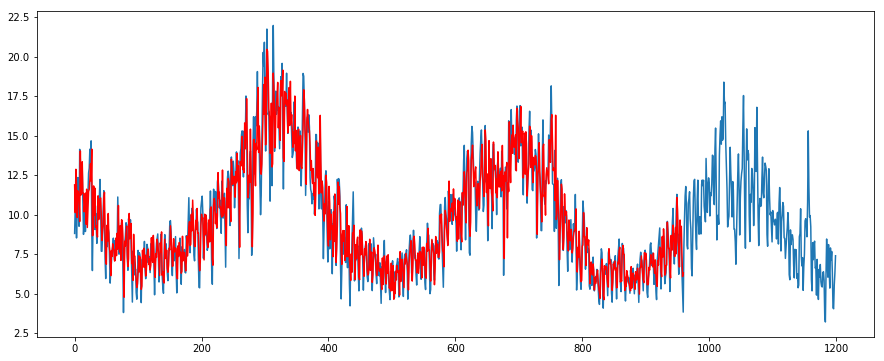

In [11]:
error = mean_squared_error(test[0:960], predictions)
print('Test MSE: %.3f' % error)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()